In [10]:
import numpy as np
from collections import Counter
class Perceptron:
    
    def __init__(self, input_length, weights=None):
        if weights==None:
            self.weights = np.random.random((input_length)) * 2 - 1
        self.learning_rate = 0.1
        
    @staticmethod
    def unit_step_function(x):
        if x < 0:
            return 0
        return 1
        
    def __call__(self, in_data):
        weighted_input = self.weights * in_data
        weighted_sum = weighted_input.sum()
        return Perceptron.unit_step_function(weighted_sum)
    
    def adjust(self, 
               target_result, 
               calculated_result,
               in_data):
        error = target_result - calculated_result
        for i in range(len(in_data)):
            correction = error * in_data[i] *self.learning_rate
            self.weights[i] += correction 
     
def above_line(point, line_func):
    x, y = point
    if y > line_func(x):
        return 1
    else:
        return 0
  
points = np.random.randint(1, 100, (100, 2))
p = Perceptron(2)
def lin1(x):
    return  x + 4
for point in points:
    p.adjust(above_line(point, lin1), 
             p(point), 
             point)
evaluation = Counter()
for point in points:
    if p(point) == above_line(point, lin1):
        evaluation["correct"] += 1
    else:
        evaluation["wrong"] += 1
print(evaluation.most_common())

[('correct', 99), ('wrong', 1)]


1.0260081041565026


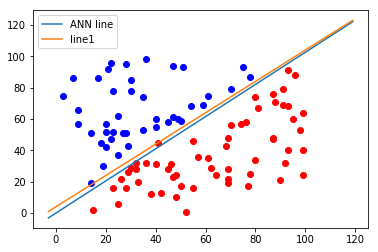

In [12]:
from matplotlib import pyplot as plt
cls = [[], []]
for point in points:
    cls[above_line(point, lin1)].append(tuple(point))
colours = ("r", "b")
for i in range(2):
    X, Y = zip(*cls[i])
    plt.scatter(X, Y, c=colours[i])
    
X = np.arange(-3, 120)
    
m = -p.weights[0] / p.weights[1]
print(m)
plt.plot(X, m*X, label="ANN line")
plt.plot(X, lin1(X), label="line1")
plt.legend()
plt.show()